# TP1 Image

## Prérequis

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

## Exercice 2

In [2]:
from skimage import io

im2 = io.imread('peppers.tiff')

print(im2[125, 55])

def bin_rgb(image, composante=0):
    n = len(image)
    m = len(image[0])
    res = np.zeros((n,m),dtype=np.uint8)
    for i in range(n):
        for j in range(m):
            if image[i, j, composante] > image[i, j, (composante+1)%3] and image[i, j, composante] > image[i, j, composante-1]:
                res[i, j] = 1
            else:
                res[i, j] = 0
    return res

#creation d'images
red_bin = bin_rgb(im2)
green_bin = bin_rgb(im2, 1)
blue_bin = bin_rgb(im2, 2)

#sauvegarde
io.imsave('red_peppers.tiff', red_bin)
io.imsave('green_peppers.tiff', green_bin)
io.imsave('blue_peppers.tiff', blue_bin)

#affichage
fig = plt.figure(figsize=(10, 7))


fig.add_subplot(1, 3, 1)
plt.imshow(red_bin, cmap='gray')
plt.axis('off')
plt.title('Red')

fig.add_subplot(1, 3, 2)
plt.imshow(green_bin, cmap='gray')
plt.axis('off')
plt.title('Green')

fig.add_subplot(1, 3, 3)
plt.imshow(blue_bin, cmap='gray')
plt.axis('off')
plt.title('Blue')

plt.show()

' '

## Exercice 3

#### Les moyennes sont quasiment identiques

moyenne = rgb2gray:  0.46788877074745877 , gray_transform:  0.46948960248161764


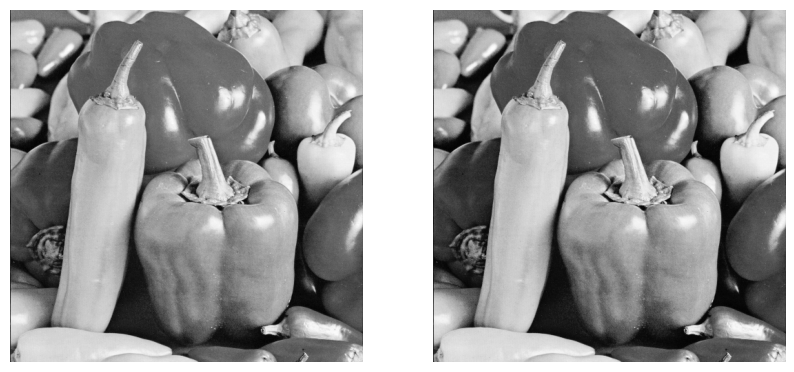

In [4]:
from skimage.color import rgb2gray
from random import randrange

im = io.imread('peppers.tiff')
#1.
red_coef, green_coef, blue_coef = 0.299, 0.587, 0.114

#on attend un format spécifique d'image ici (RGB)
gray_transform = lambda L : [[ L[i][j][0]*red_coef+L[i][j][1]*green_coef+L[i][j][2]*blue_coef for j in range(len(L[0]))] for i in range(len(L))]

im_gray = gray_transform(im)
im_gray = np.array(im_gray, dtype=np.uint8)

lib_gray = rgb2gray(im)

#3.
dim = len(im)*len(im[0])
gray_sum, lib_sum = 0, 0

for i in range(len(im)):
    for j in range(len(im[0])):
                   gray_sum += im_gray[i, j]
                   lib_sum += lib_gray[i, j]
gray_sum /= 255
                   
print("moyenne = rgb2gray: ", lib_sum/dim, ", gray_transform: ", gray_sum/dim)

#2.
#affichage
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(lib_gray, cmap='gray')
plt.axis('off')

plt.show()

## Exercice 4

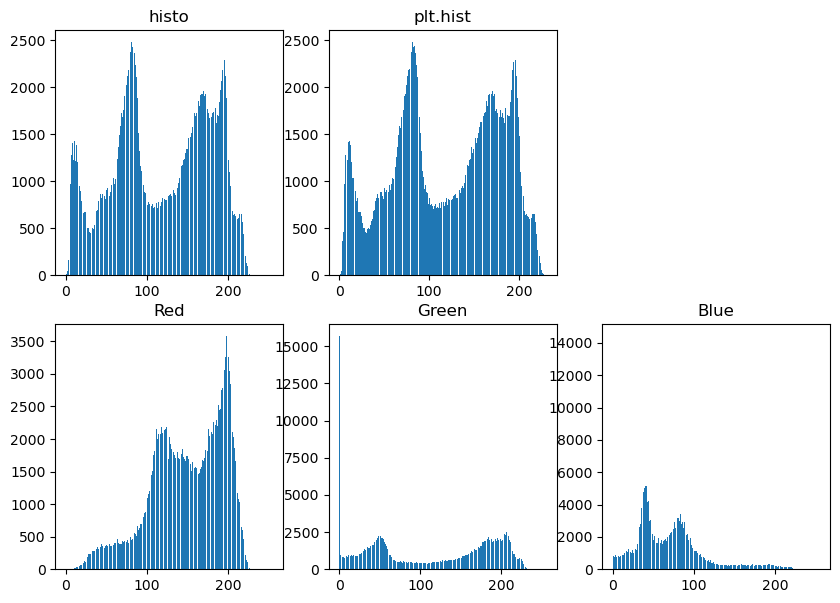

In [90]:
#1.
def histo(L, c=0):
    data = dict((i, 0) for i in range(256))
    for x in range(len(L)):
        for y in range(len(L[0])):
            if(not hasattr(L[x,y], '__iter__')):
                if L[x,y] > 1:
                    val = round(L[x, y])
                else:
                    val = round(L[x, y]*255)

            else:
                val = round(L[x, y, c])
            data[val] += 1
    #print(c, data[0])
    plt.bar([x for x in data], [data[x] for x in data])
    return None

fig = plt.figure(figsize=(10,7))
fig.add_subplot(2, 3, 1)
plt.title("histo")
histo(lib_gray)

#2. 
fig.add_subplot(2,3,2)
plt.title("plt.hist")
plt.hist([round(x*255) for l in lib_gray for x in l], 256)


#3. L'image couleur contient plusieurs 3 couleurs donc 3 histogrammes pour cette image. On peut les superposer mais cela réduit la visibilité.
fig.add_subplot(2,3,4)
plt.title("Red")
histo(im2)

fig.add_subplot(2,3,5)
plt.title("Green")
histo(im2, c=1)

#La barre pour zero dans l'histogramme ne s'affiche pas alors qu'il y en a beaucoup. 
#Il n'y a quasiment pas de bleu et pourtant on trouve beaucoup de valeurs
fig.add_subplot(2,3,6)
plt.title("Blue")
histo(im2, c=2)

plt.show()

## Exercice 5

32


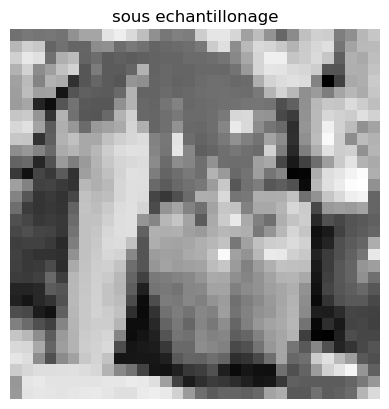

In [88]:
def sousEch(L, n):
    if not hasattr(L[0,0], '__iter__')
    ech_val = np.zeros((len(L)//n, len(L[0])//n),dtype=int)

    #moyenne calcul
    carre = 0
    for i in range(0,len(L),n):
        carre=0
        for j in range(0, len(L[0]), n):
            carre= L[i:i+n,j:j+n].sum()
            ech_val[i//n,j//n] = carre//(n**2)
    return ech_val  



sEch = sousEch(im_gray, 16)
print(len(sEch))
plt.imshow(sEch, cmap='gray')
plt.axis('off')
plt.title('sous echantillonage')
plt.show()